<div align="center" >
<span style="font-size: 45px; background-color:powderblue; font-family:Georgia">Pure Python vs NumPy vs Sklearn Performance Comparison</span> 
</div>
<div align="center" >
<span style='font-size: 18px;font-family:Georgia;'>How much faster does the application run when implemented with NumPy instead of pure Python? What about TensorFlow? 
</span>
</div>

# Technical Background
## Introduction
Linear regression algorithms show a linear relationship between a dependent $y$ and one or more independent $x$ variables, hence called linear regression.

## Usage in Real-Word apps
Linear regression models have many real-world applications in an array of industries such as:
* Economics (e.g. predicting growth)
* Business (e.g. predicting product sales, employee performance)
* Social science (e.g. predicting political leanings from gender or race)
* Healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors)

## Important Assumptions in Rgression Aalysis  

1. **Linearity**: It is assumed that there is a linear relationship between the dependent $y$ and the independent $X$ variable(s).
2. **Autocorrelation**: There should be no correlation between the residual (error) terms. If some correlation is present then it means that the model is unable to identify some relationship in the data.
3. **Multicollinearity**: There should be no correlation between the independent variables. If the independent variables are moderately or highly correlated then it becomes difficult to find out which variable is contributing to predict the dependent (response) variable.
4. **Homoskedasticity**: The error terms must have constant variance.This non-constant variance arises in the presence of _outliers_. When this phenomenon occurs, the confidence interval for the out of sample prediction tends to be _unrealistically_ wide or narrow.
5. **Normality**: The error terms must be normally distributed. Presence on non-normal distribution suggests that a few unusual data points must be studied closely to make a better model.

> **Note**: Implementation of Univariate Linear Regression in Python without using any machine learning library. The code will be explained step-by-step with provided mathematical background.

## Mathematics behind the model

### Simple Linear Regression
If a single independent variable (x) is used to predict the value of a numerical dependent variable (y). 
An estimate of this relationship is given as the linear function:
$$yᵢ = β₀ + β₁Xᵢ + ε$$

**Where:**
* $y$ hat sub i $(ŷᵢ)$ represents the estimated output given the input. 
* $Xᵢ$ In this equation, $β₀$ is a bias and $β₁$ is the weight of the model. If the model is charted so that the output is the y-axis and the input is the x-axis, $β₀$ refers to the $y$ - intercept and $β₁$ represents the slope.
* $ε$ represents the random error term. The random error term represents the residual error between an estimated relationship and the actual one. It is subject to variability.
![Example of a two dimensional representation of the equation](Images/Linear%20regression%20representation%20graph.png)

### Multiple Linear Regression
If more than one independent variable (X) is used to predict the value of a numerical dependent variable (y).
An estimate of the relationship can be given as:
$$ŷᵢ = β₀ + β₁Xᵢ₁ + β₂Xᵢ₂ + … βnXn + ε$$

**Where:**

* $Xᵢ₁, … Xᵢn$ represents all of the individual input datapoints where $Xᵢ₁$ represents a singular datapoint of input type $X₁$.
* $n$ is the number of input data types
A multiple linear regression equation can be graphed as an n-dimensional plane.

![Example of n-dimensional plane](Images/n-dimensional_plane.png)

### Minimize objective function for linear regression 

The simple linear regression can be solved using Ordinary Least Squares (OLS), which is a statistical method, to find the model parameters.Our goal is to find statistically significant values of the parameters $β₀$ and $βn$ that minimise the difference between $y$ and $ŷ$.
![Ordinary Least Squares Single Linear Regression](Images/Ordinary_least_squares.jpeg)

### Minimize objective function for multiple linear regression 

We have more than one predictor variable which makes it hard for us to use that simple OLS method.we can implement a linear regression model for performing OLS regression using one of the following approaches

> **Note**: For very large datasets, computing the matrix inverse is costly or in some cases, the inverse does not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity)

#### Solving the model parameters **analytically** 
**(Normal Equations method)**

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the model parameters. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations. So this method should be preferred for smaller datasets.
![Ordinary Least Squares for Multiple Linear Regression](Images/OLS%20for%20MLR.png)

The closed-form solution for finding the optimal values for the model parameters is:
$$Y = \beta^T.X$$
Finding the minimum can be achieved through setting the gradient of the loss to zero and solving for ${\beta}$ we get:
$$β = (X^T.X)^{-1}X^T.Y$$

> **Note**: Matrices expressed in upper case letters. 

#### Solving the model parameter using an **optimization** algorithm 
**(Gradient Descent, Stochastic Gradient Descent, etc.)**

The general idea of Gradient Descent is to tweak parameters iteratively to minimize a cost function. **Error/Cost** here represents the sum of squared error between the predicted and the actual value. This error is defined in terms of a function and is called Mean Squared Error (MSE) cost function. So, the objective of this Gradient Descent optimization algorithm is to minimize the MSE cost function.

It measures the local gradient of the error function with regards to the parameter vector ${\beta}$ and it goes in the direction of the descending gradient. Once the gradient is zero, you have reached a minimum.

An important parameter in the Gradient Descent is the size of the steps, determined by the **learning rate** hyperparameter. 
* If the learning rate is too small, the algorithm will have to go through ***many iterations to converge***, which will take a **long time**.
* If the learning rate is too high, the algorithm will jump over the minimum, making it **diverge**. Hence the algorithm won’t reach the minimum.

![gradient desent](Images/gradient_descent.jpeg)

To implement the Gradient Descent, you need to compute the gradient of the cost function concerning the parameter vector ${\beta}$. To get the gradient, we need to take the partial derivative of the cost function.

The MSE cost function is defined as:
$$MSE(β) =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - β^T.X^{(i)})^2$$
$$\frac{\partial}{\partialβ_{i}}{MSE(β)}=\frac{2}{m}\sum_{i=1}^{m} (y^{(i)} - β^T.X^{(i)})X_{j}^{(i)}$$

**Where:**
* $m$ is the total number of observations (data points) $\frac{1}{m} \sum_{i=1}^{m}$ is the mean
The vectorized form looks like
$$\begin{split}\begin{align}∇_βMSE(β) =
  \begin{bmatrix} 
  \frac{\partial}{\partialβ_0}{MSE(β)}\\
  \frac{\partial}{\partialβ_1}{MSE(β)}\\
  \text{.}\\
  \text{.}\\
  \frac{\partial}{\partialβ_n}{MSE(β)}
  \end{bmatrix}
  = \frac{2}{m} X^T.(X.β-Y)\end{align}\end{split}$$
  
The update rule to get the updated weights/parameters is given below:
 $$β^{(\text{next step})} = β - α\frac{\partial}{\partialβ_n}{MSE(β)} $$
**Where:**
 * α is the learning rate hyperparameter.


<br/><br/>

---

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)
import time
import os
import math
import timeit 
import itertools as it
import opendatasets as od
# avoid jupter warning
import warnings
# import all modules and libraries required to load, transform, analyze and plot
import numpy as np
import pandas as pd
from pandas.plotting import table

import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
%matplotlib inline

import statsmodels.api as sm
import statsmodels.tools.eval_measures as ev
from statsmodels.formula.api import ols

import scipy
from scipy import stats
from scipy.stats import randint
from haversine import haversine #to calculate mileage

import sklearn
from sklearn import linear_model
assert sklearn.__version__ >= "0.20"


In [2]:
mat.rcParams['figure.figsize'] = (9, 6)
mat.rc('axes', labelsize = 16)
mat.rc('xtick', labelsize = 14)
mat.rc('ytick', labelsize = 14)
# set display option to remove scientific notation and 
pd.options.display.float_format = '{:,.2f}'.format # remove restrictions on dataframe rows/columns display
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 20)
warnings.filterwarnings('ignore')   # avoid jupter warning
myseed=42
np.random.seed(myseed)

In [3]:
# Create graphs dir to save all created graphs
project_path = os.getcwd()
graphs_path = os.path.join('.',"graphs")

if not os.path.isdir(graphs_path):
    os.makedirs(graphs_path, exist_ok = True)
    print("Graphs directory successfully created (>‿◠)✌")
else:
    print("Graphs directory already exists  (•◡•)")

Graphs directory already exists  (•◡•)


# Proplem Specification
It is technically possible to implement scalar and matrix calculations using `Python` lists. However, this can be unwieldy, and performance is poor when compared to languages suited for numerical computation, such as `MATLAB` or Fortran, or even some general purpose languages, such as `C` or `C++`.

To circumvent this deficiency, several libraries have emerged that maintain Python’s ease of use while lending the ability to perform numerical calculations in an efficient manner. Two such libraries worth mentioning are `NumPy` (one of the pioneer libraries to bring efficient numerical computation to Python) and `Sklrean` (Simple and efficient tools for predictive data analysisSimple and efficient tools for predictive data analysis).

Although it is possible to use this deterministic approach to estimate the coefficients of the linear model, it is not possible for some other models, such as neural networks. In these cases, iterative algorithms are used to 
estimate a solution for the parameters of the model.

One of the most-used algorithms is gradient descent, which at a high level consists of updating the parameter coefficients until we converge on a minimized loss (or cost). 

# Create Dataset with Gaussian noise
This program creates a set of 10,000 inputs x linearly distributed over the interval from 0 to 2. It then creates a set of desired outputs $y = 3 + 2 * x + \text{noise}$, where noise is taken from a Gaussian (normal) distribution with zero mean and standard deviation sigma = 0.1.

* $X$: A set of 10,000 inputs from 0 to 2.
* $y = 3 + 2 * x + \text{noise}$

In [4]:
n = 10000
sigma = 0.1
noise = sigma * np.random.randn(n)
X = np.linspace(0, 2, n)
y = 3 + 2 * X + noise
y = y.reshape(n,1)
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (10000,)
y shape: (10000, 1)


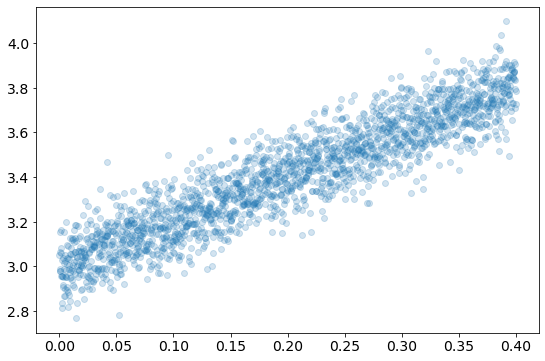

In [5]:
plt.scatter(X[:2000],y[:2000], alpha=0.2)

## Gradient Descent in Pure Python
The Python function below estimates the parameters $w_0$ and $w_1$ using gradient descent.

In [6]:
def py_descent(x, y, lr, n_epochs):

    m = len(x)
    # "Empty" predictions, errors, weights, gradients.
    y_pred = [0] * m
    w = [0, 0]
    grad = [0, 0]

    for _ in it.repeat(None, n_epochs):

        err = tuple(i - j for i, j in zip(y, y_pred))
        grad[0] = 2/m * sum(err)
        grad[1] = 2/m * sum(i * j for i, j in zip(err, x))
        w = [i + lr * j for i, j in zip(w, grad)]
        y_pred = (w[0] + w[1] * i for i in x)
    return w

>  `itertools.repeat()` faster than `for _ in range(n_epochs)`.because `repeat()` does not need to manufacture a distinct integer for each loop. It just needs to update the reference count to None.

In [7]:
# `lr` is a step size, or scaling factor.
x_list = X.tolist()
y_list = y.squeeze().tolist()   
lr = 0.001
epochs = 10000

start = time.time()
py_weights = py_descent(x_list, y_list, lr, epochs)
end = time.time()

print(f"Weights: {py_weights}")
print('Solve time: {:.2f} seconds'.format(round(end-start, 2)))

Weights: [2.965722823133815, 2.0285925159614293]
Solve time: 27.68 seconds


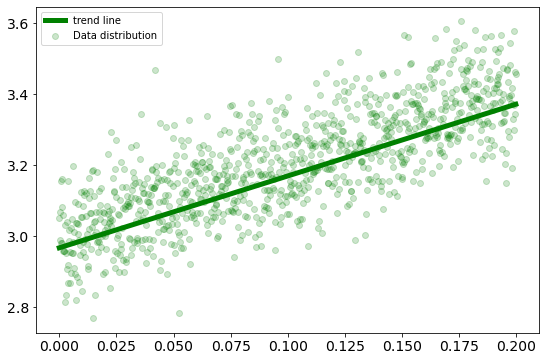

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[:1000],y[:1000], alpha=0.2, color='g', label = "Data distribution")
ax.plot(X[:1000], py_weights[1]*X[:1000]+ py_weights[0], color='green',linewidth=5, label = "trend line")
ax.legend()
plt.show()
fig.savefig(os.path.join(graphs_path,"list_result.png"))

## Gradient Descent Using NumPy

NumPy adds support for large multidimensional arrays and matrices along with a collection of mathematical functions to operate on them. The function below estimates the parameters $w_0$ and $w_1$ using gradient descent.


In [9]:
X = X.reshape(X.shape[0], X.ndim)

In [10]:
# import my module 
from MultipleLinearRegression import LinearRegression, FeatureScaler

lr = 0.001
epochs = 10000

start = time.time()
np_LR = LinearRegression(X,y)
np_weights,weights_history, costs = np_LR.gradient_descent(lr,epochs)
end = time.time()

In [11]:
print(f"Weights: {np.ravel(np_weights)}")
print('Solve time: {} seconds'.format(end-start))

Weights: [2.95424797 2.03831285]
Solve time: 0.9097013473510742 seconds


In [12]:
# Try to calculate time using timeit module 
setup = "from MultipleLinearRegression import LinearRegression, FeatureScaler;from __main__ import X, y, lr, epochs;"
code = "np_LR = LinearRegression(X,y);np_weights,weights_history, costs = np_LR.gradient_descent(lr,epochs)"
np_time = timeit.repeat(code,setup = setup,repeat=5,number = 5)

In [13]:
print('Solve time Using (timeit) module: {} seconds'.format(min(np_time)/5))

Solve time Using (timeit) module: 0.9215819600000004 seconds


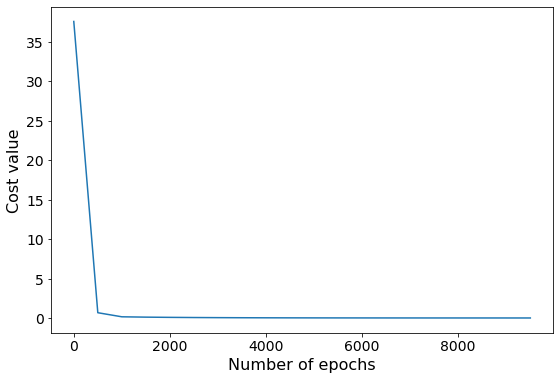

In [14]:
fig, ax = plt.subplots()
ax.plot(list(range(0,epochs,500)), costs[::500])
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Cost value')
plt.show()
fig.savefig(os.path.join(graphs_path,"numpy_error_vs_epochs.png"))

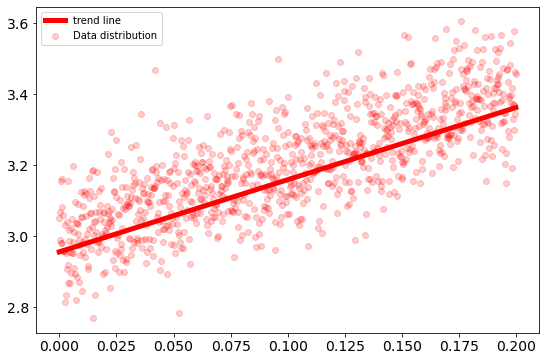

In [15]:
fig, ax = plt.subplots()
ax.scatter(X[:1000],y[:1000], alpha=0.2, color='r', label = "Data distribution")
ax.plot(X[:1000], np_weights[1]*X[:1000]+ np_weights[0], color='r',linewidth=5, label = "trend line")
ax.legend()
plt.show()
fig.savefig(os.path.join(graphs_path,"numpy_result.png"))

## Gradient Descent Using Scikit-learn

In [16]:
# import scikit-learn liberary
lr = 0.001
epochs = 10000

start = time.time()
sk_LR = linear_model.LinearRegression()
sk_LR.fit(X,y)
end = time.time()

In [17]:
sk_weights = np.array([sk_LR.intercept_,sk_LR.coef_]).ravel()
print(f"Weights: {sk_weights}")
print('Solve time: {}seconds'.format(end-start))

Weights: [3.0015046093655 1.9982817922976575]
Solve time: 0.0009982585906982422seconds


In [18]:
# Try to calculate time using timeit module 
setup = "from __main__ import X, y, lr, epochs, linear_model"
code = "sk_LR = linear_model.LinearRegression();sk_LR.fit(X,y)"
np_time = timeit.repeat(code,setup = setup,repeat=5,number = 5)
print('Solve time Using (timeit) module: {} seconds'.format(min(np_time)/5))

Solve time Using (timeit) module: 0.0003657000000004018 seconds


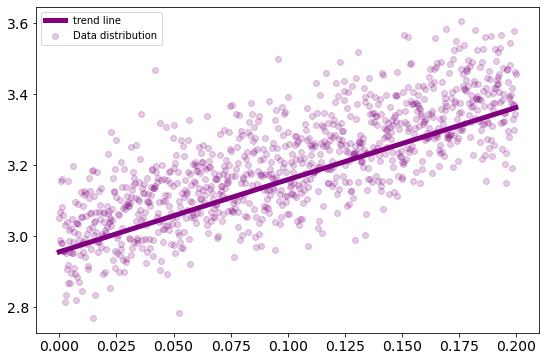

In [19]:
fig, ax = plt.subplots()
ax.scatter(X[:1000],y[:1000], alpha=0.2, color='purple', label = "Data distribution")
ax.plot(X[:1000], np_weights[1]*X[:1000]+ np_weights[0], color='purple',linewidth=5, label = "trend line")
ax.legend()
plt.show()
fig.savefig(os.path.join(graphs_path,"sklearn_result.png"))

# References

* [Least squares approximation](https://en.wikipedia.org/wiki/Least_squares)
* [Linear regression from ML cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html)
* [Regression-metrics from machinelearningmastery](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)
* [Linear regression a complete story](https://medium.com/analytics-vidhya/linear-regression-a-complete-story-c5edd37296c8)
* [Introduction to linear regression in python](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)
* [Machine learning multivariate linear regression](https://medium.com/analytics-vidhya/machine-learning-multivariate-linear-regression-8f9878c0f56)
* [Numpy tensorflow performance from realpython](https://realpython.com/numpy-tensorflow-performance/https://realpython.com/numpy-tensorflow-performance/)

# More Resouces

* For more details see the project [repository]() on github.
* Linear regression implementation modeule from [here]()
* Dispaly the project notebook from [here]()* For more details see the project [repository]() on github.
* Linear regression implementation modeule from [here]()
* Dispaly the project notebook from [here]()

In [24]:
#print(os.__version__)
#print(itertools.__version__)
#print(timeit.__version__)
#print(time.__version__)
print(np.__version__)
print(mat.__version__)
print(sklearn.__version__)


1.18.5
3.3.2
1.0.1
